## **Deep Neural Networks (DNN)**

### **Definition**
* A network with **more than one hidden layer** is called a **Deep Neural Network (DNN)**.
* Hidden layers can have a different number of neurons (e.g., H1=3, H2=5).

### **Capacity and Overfitting**
* Adding neurons to **a single** hidden layer increases model complexity but can lead to **overfitting**.
* Adding **more layers** generally tends to improve performance and can reduce the risk of overfitting (if the network is well-trained and regularized).

### **Typical Architecture (PyTorch)**
* **Structure**: Input (D_in) → Hidden1 (H1) → Hidden2 (H2) → Output (D_out)
* **Forward Pass**:
  * Hidden Layers: `Linear` → Activation function (sigmoid/tanh/ReLU)
  * Output Layer: Only `Linear` (softmax is often handled implicitly by `CrossEntropyLoss`)
* **Implementation**: Can be built using `nn.Module` classes or `nn.Sequential`.
* **Inspection**: The `.parameters()` attribute allows you to inspect the shapes of the weights.

### **Dimensional Example**
* Input has 3 features.
* Hidden1 with 3 neurons → Each neuron has 3 weights and 1 bias.
* Hidden2 with 4 neurons → Each neuron receives 3 inputs.
* Output with 3 neurons → Each neuron receives 4 inputs.

### **Activation Functions**
* Easily interchangeable in the `forward` method: **Sigmoid**, **Tanh**, **ReLU**.

### **MNIST Training Example**
* **Input**: 784 dimensions (28×28 flattened image).
* **Architecture**: Two hidden layers with 50 neurons each.
* **Output**: 10 classes (digits 0–9).
* **Training Setup**:
  * **Loss Function**: Cross-Entropy.
  * **Optimizer**: Stochastic Gradient Descent (SGD).
  * **Tracking**: Loss per iteration and validation accuracy per epoch.

### **Expected Results**
* **Tanh** and **ReLU** outperform **Sigmoid** in both final **loss** and **validation accuracy**.
* The architecture can be extended to more layers (deeper networks) and can be generalized to an arbitrary number of layers.

---

In [1]:
import torch 
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import torch.nn.functional as F
import matplotlib.pylab as plt
import numpy as np
torch.manual_seed(2)

In [2]:
# Create the model class using sigmoid as the activation function

class Net(nn.Module):
    
    # Constructor
    def __init__(self, D_in, H1, H2, D_out):
        super(Net, self).__init__()
        self.linear1 = nn.Linear(D_in, H1)
        self.linear2 = nn.Linear(H1, H2)
        self.linear3 = nn.Linear(H2, D_out)
    
    # Prediction
    def forward(self,x):
        x = torch.sigmoid(self.linear1(x)) 
        x = torch.sigmoid(self.linear2(x))
        x = self.linear3(x)
        return x

In [3]:
# Create the model class using Tanh as a activation function

class NetTanh(nn.Module):
    
    # Constructor
    def __init__(self, D_in, H1, H2, D_out):
        super(NetTanh, self).__init__()
        self.linear1 = nn.Linear(D_in, H1)
        self.linear2 = nn.Linear(H1, H2)
        self.linear3 = nn.Linear(H2, D_out)
    
    # Prediction
    def forward(self, x):
        x = torch.tanh(self.linear1(x))
        x = torch.tanh(self.linear2(x))
        x = self.linear3(x)
        return x

In [4]:
# Create the model class using Relu as a activation function

class NetRelu(nn.Module):
    
    # Constructor
    def __init__(self, D_in, H1, H2, D_out):
        super(NetRelu, self).__init__()
        self.linear1 = nn.Linear(D_in, H1)
        self.linear2 = nn.Linear(H1, H2)
        self.linear3 = nn.Linear(H2, D_out)
    
    # Prediction
    def forward(self, x):
        x = torch.relu(self.linear1(x))  
        x = torch.relu(self.linear2(x))
        x = self.linear3(x)
        return x

In [5]:
# Train the model

def train(model, criterion, train_loader, validation_loader, optimizer, epochs=100):
    i = 0
    useful_stuff = {'training_loss': [], 'validation_accuracy': []}  
    
    for epoch in range(epochs):
        for i, (x, y) in enumerate(train_loader):
            optimizer.zero_grad()
            z = model(x.view(-1, 28 * 28))
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
            useful_stuff['training_loss'].append(loss.data.item())
        
        correct = 0
        for x, y in validation_loader:
            z = model(x.view(-1, 28 * 28))
            _, label = torch.max(z, 1)
            correct += (label == y).sum().item()
    
        accuracy = 100 * (correct / len(validation_dataset))
        useful_stuff['validation_accuracy'].append(accuracy)
    
    return useful_stuff

### **Make Some Data**

In [6]:
# Create the training dataset

train_dataset = dsets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())

# Create the validating dataset

validation_dataset = dsets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

# Create the criterion function

criterion = nn.CrossEntropyLoss()

# Create the training data loader and validation data loader object

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=2000, shuffle=True)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=5000, shuffle=False)

100%|██████████| 9.91M/9.91M [00:02<00:00, 3.64MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 242kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 938kB/s] 
100%|██████████| 4.54k/4.54k [00:00<00:00, 2.27MB/s]


### **Define Neural Network, Criterion function, Optimizer and Train the Model**


In [7]:
# Set the parameters for create the model

input_dim = 28 * 28
hidden_dim1 = 50
hidden_dim2 = 50
output_dim = 10

# Set the number of iterations

cust_epochs = 10

### **Test Sigmoid ,Tanh and Relu**

In [8]:
# Train the model with sigmoid function

learning_rate = 0.01
model = Net(input_dim, hidden_dim1, hidden_dim2, output_dim)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
training_results = train(model, criterion, train_loader, validation_loader, optimizer, epochs=cust_epochs)

In [9]:
# Train the model with tanh function

learning_rate = 0.01
model_Tanh = NetTanh(input_dim, hidden_dim1, hidden_dim2, output_dim)
optimizer = torch.optim.SGD(model_Tanh.parameters(), lr=learning_rate)
training_results_tanch = train(model_Tanh, criterion, train_loader, validation_loader, optimizer, epochs=cust_epochs)

In [10]:
# Train the model with relu function

learning_rate = 0.01
modelRelu = NetRelu(input_dim, hidden_dim1, hidden_dim2, output_dim)
optimizer = torch.optim.SGD(modelRelu.parameters(), lr=learning_rate)
training_results_relu = train(modelRelu, criterion, train_loader, validation_loader, optimizer, epochs=cust_epochs) 

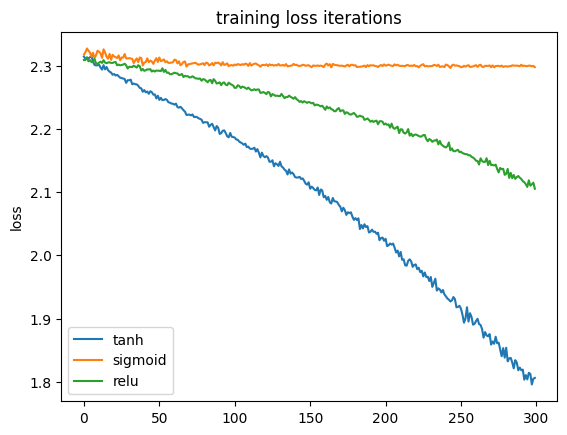

In [11]:
# Compare the training loss

plt.plot(training_results_tanch['training_loss'], label='tanh')
plt.plot(training_results['training_loss'], label='sigmoid')
plt.plot(training_results_relu['training_loss'], label='relu')
plt.ylabel('loss')
plt.title('training loss iterations')
plt.legend()

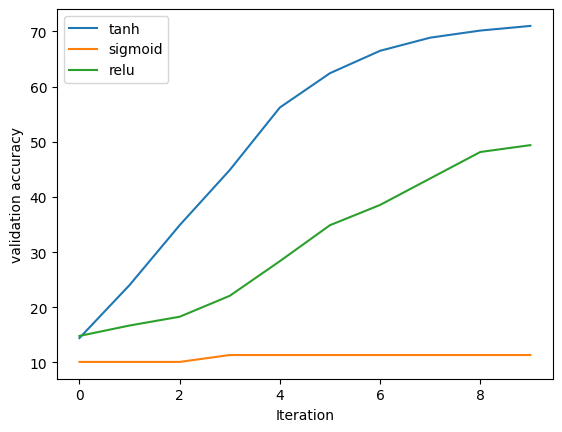

In [12]:
# Compare the validation loss

plt.plot(training_results_tanch['validation_accuracy'], label = 'tanh')
plt.plot(training_results['validation_accuracy'], label = 'sigmoid')
plt.plot(training_results_relu['validation_accuracy'], label = 'relu') 
plt.ylabel('validation accuracy')
plt.xlabel('Iteration')   
plt.legend()

---